In [80]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [81]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = np.round (0.2989 * r + 0.5870 * g + 0.1140 * b)

    return gray

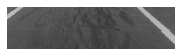

In [84]:
I=Image.open(r"C:\Users\Gama\Documents\Github\PDI\TalentJ1\100.jpg")
I=np.array(I)
I=rgb2gray(I)
I=I.astype(int)
fig1=plt.figure(figsize = (3,3))
plt.imshow(I, cmap='gray',vmin=0,vmax=255);
plt.axis('off');

(150, 600)


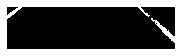

In [85]:
si=I.shape
S=np.zeros(si)
print(S.shape)
t=180
for x in range(si[0]):
    for y in range(si[1]):
        if I[x,y]>=t:
            S[x,y]=255
S=S.astype(int)
fig2=plt.figure(figsize = (3,3))
plt.imshow(S, cmap='gray',vmin=0,vmax=255);
plt.axis('off');            


47 193


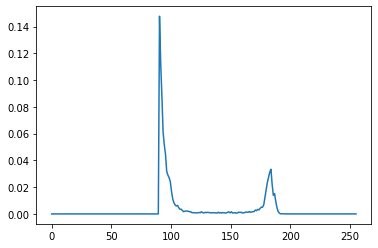

In [86]:
##### Otsu method
mini=np.amin(I)
maxi=np.amax(I)
print(mini,maxi)
pi, bins,=np.histogram(I.ravel(), np.arange(256))
c_min=90
pi[0:c_min]=0
pi=pi/np.sum(pi)
bins = np.linspace(0,255,255)
plt.plot(bins,pi)
plt.show()

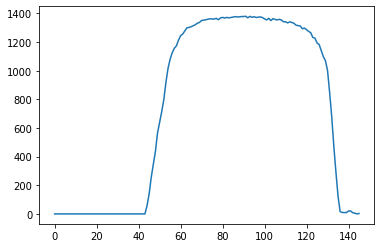

181


In [87]:
sgm2=[]
for t in range(mini,maxi):
    w0= np.sum(pi[mini:t])+0.0000001
    w1= 1-w0
    miu0=np.sum(np.arange(t)*pi[0:t])/w0
    miu1=np.sum(np.arange(t+1,maxi)*pi[t+1:maxi])/w1
    sgm2=np.append(sgm2,w0*w1*(miu0-miu1)**2)
    #print(sgm2)
plt.plot(sgm2)
plt.show()
umbral=np.argmax(sgm2)+c_min
print(umbral)

(150, 600)


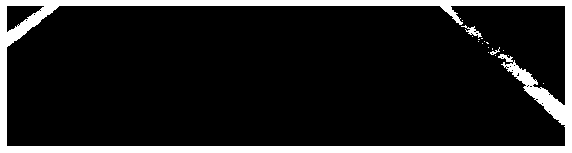

In [88]:
si=I.shape
S=np.zeros(si)
print(S.shape)
for x in range(si[0]):
    for y in range(si[1]):
        if I[x,y]>=umbral:
            S[x,y]=255
S=S.astype(int)
fig2=plt.figure(figsize = (10,10))
plt.imshow(S, cmap='gray',vmin=0,vmax=255);
plt.axis('off');    